# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 11 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum_cleaner

- 7 electric space heater

- 8 alectric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm1/', 'dsual.h5','2022-11-07', '2022-11-07')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp          W       VAR           VA        f      VLN  \
0      1.667813e+12    17.6157  -5.72538    18.522721  50.0063  243.036   
1      1.667813e+12    17.0138  -6.33315    18.154254  50.0063  242.976   
2      1.667813e+12    16.5847  -5.67179    17.527691  50.0063  243.006   
3      1.667813e+12    17.0224  -6.68467    18.287857  50.0060  242.986   
4      1.667813e+12    16.7171  -6.39622    17.898931  50.0060  243.022   
...             ...        ...       ...          ...      ...      ...   
29289  1.667819e+12  2656.1100  11.01860  2656.129300  49.9536  237.988   
29290  1.667819e+12  2655.2800   9.59250  2655.297112  49.9540  237.935   
29291  1.667819e+12  2656.2100  11.17100  2656.236625  49.9546  237.923   
29292  1.667819e+12  2654.4400   9.93879  2654.455130  49.9550  237.888 

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  7.40977 -1.077810  7.487750  50.0423   
2022-11-07 10:25:50.805000+01:00  7.16313 -1.105450  7.247932  50.0423   
2022-11-07 10:25:51.004000+01:00  7.39859 -0.889593  7.451879  50.0425   
2022-11-07 10:25:51.205000+01:00  7.11625 -1.496420  7.271882  50.0427   
2022-11-07 10:25:51.404000+01:00  6.83709 -1.115010  6.927414  50.0430   
...                                   ...       ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  7.01313 -0.941539  7.076048  50.0100   
2022-11-07 12:37:14.882000+01:00  7.43456 -1.056610  7.509269  50.0100   
2022-11-07 12:37:15.082000+01:00  6.61771 -0.616003  6.646318  50.0098   
2022-11-07 12:37:15.282000+01:00  6.66844 -1.028840  6.747343  50.0098   
2022-11-07 12:37:15.482000+01:00  7.30953 -0.672236  7.340372  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  5.19575 -1.327860  5.362746  50.0423   
2022-11-07 10:25:50.804000+01:00  5.18779 -1.771850  5.482026  50.0423   
2022-11-07 10:25:51.004000+01:00  5.14824 -1.363840  5.325831  50.0425   
2022-11-07 10:25:51.205000+01:00  5.68548 -1.584120  5.902048  50.0427   
2022-11-07 10:25:51.404000+01:00  4.87322 -1.241500  5.028879  50.0430   
...                                   ...       ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  4.64529 -0.695379  4.697044  50.0100   
2022-11-07 12:37:14.882000+01:00  5.09310 -1.487630  5.305915  50.0100   
2022-11-07 12:37:15.082000+01:00  5.57499 -0.869512  5.642389  50.0098   
2022-11-07 12:37:15.282000+01:00  4.71535 -1.471700  4.939675  50.0098   
2022-11-07 12:37:15.482000+01:00  4.62631 -0.527483  4.656287  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605

Conversion of timestamp
                                    W      VAR        VA        f      VLN  \
2022-11-07 10:25:50.658000+01:00  0.0 -2.52366  3.906039  50.0063  243.036   
2022-11-07 10:25:50.858000+01:00  0.0 -2.73688  3.859873  50.0063  242.976   
2022-11-07 10:25:51.058000+01:00  0.0 -2.26600  3.312324  50.0063  243.006   
2022-11-07 10:25:51.258000+01:00  0.0 -2.45637  4.146548  50.0060  242.986   
2022-11-07 10:25:51.458000+01:00  0.0 -2.86870  4.083566  50.0060  243.022   
...                               ...      ...       ...      ...      ...   
2022-11-07 12:02:18.258000+01:00  0.0 -2.68008  3.769015  49.9590  238.057   
2022-11-07 12:02:18.458000+01:00  0.0 -2.85734  3.744333  49.9588  237.978   
2022-11-07 12:02:18.658000+01:00  0.0 -2.03193  3.708361  49.9588  237.930   
2022-11-07 12:02:18.858000+01:00  0.0 -2.66558  3.671140  49.9588  237.916   
2022-11-07 12:02:19.058000+01:00  0.0 -3.04176  3.989035  49.9588  237.845   

                                       

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  6.89174 -1.82640  7.129639  50.0423   
2022-11-07 10:25:50.804000+01:00  7.66633 -1.83649  7.883231  50.0423   
2022-11-07 10:25:51.004000+01:00  7.22171 -2.35101  7.594757  50.0425   
2022-11-07 10:25:51.205000+01:00  7.15238 -1.49984  7.307940  50.0427   
2022-11-07 10:25:51.404000+01:00  7.20300 -2.01206  7.478738  50.0430   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  7.27426 -1.06880  7.352360  50.0100   
2022-11-07 12:37:14.882000+01:00  7.09840 -1.89894  7.348011  50.0100   
2022-11-07 12:37:15.082000+01:00  7.55217 -1.50120  7.699923  50.0098   
2022-11-07 12:37:15.282000+01:00  6.43803 -1.60595  6.635310  50.0098   
2022-11-07 12:37:15.482000+01:00  7.35896 -1.74048  7.561984  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605000+01:00  2

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-11-07 10:25:50.605000+01:00  5.11365 -1.838920  5.434249  50.0423   
2022-11-07 10:25:50.804000+01:00  4.35526 -0.630443  4.400655  50.0423   
2022-11-07 10:25:51.004000+01:00  4.42196 -0.789712  4.491923  50.0425   
2022-11-07 10:25:51.205000+01:00  4.61164 -1.248350  4.777615  50.0427   
2022-11-07 10:25:51.404000+01:00  4.46847 -1.074550  4.595855  50.0430   
...                                   ...       ...       ...      ...   
2022-11-07 12:37:14.682000+01:00  4.60709 -1.073860  4.730588  50.0100   
2022-11-07 12:37:14.882000+01:00  4.56791 -0.926672  4.660959  50.0100   
2022-11-07 12:37:15.082000+01:00  4.61689 -1.388420  4.821140  50.0098   
2022-11-07 12:37:15.282000+01:00  4.28312 -0.520104  4.314585  50.0098   
2022-11-07 12:37:15.482000+01:00  3.97430 -1.246990  4.165340  50.0098   

                                      VLN        PF         A  
2022-11-07 10:25:50.605

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.658000+01:00  7.46735 -4.59234  8.766469  50.0063   
2022-11-07 10:25:50.858000+01:00  7.10059 -4.79041  8.565416  50.0063   
2022-11-07 10:25:51.058000+01:00  6.89600 -4.03357  7.989022  50.0063   
2022-11-07 10:25:51.258000+01:00  7.47236 -4.56857  8.758312  50.0060   
2022-11-07 10:25:51.458000+01:00  6.66467 -4.19305  7.873977  50.0060   
...                                   ...      ...       ...      ...   
2022-11-07 12:14:06.427000+01:00  6.48141 -4.11490  7.677310  49.9983   
2022-11-07 12:14:06.627000+01:00  6.89190 -3.82017  7.879847  49.9983   
2022-11-07 12:14:06.827000+01:00  6.58665 -4.42117  7.932886  49.9983   
2022-11-07 12:14:07.027000+01:00  6.56359 -5.05716  8.285871  49.9983   
2022-11-07 12:14:07.227000+01:00  7.37123 -4.30389  8.535716  49.9985   

                                      VLN        PF         A  
2022-11-07 10:25:50.658000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  7.90479 -2.80851  8.388886  50.0503   
2022-11-07 10:25:50.676000+01:00  7.38013 -2.58180  7.818693  50.0513   
2022-11-07 10:25:50.875000+01:00  7.72246 -2.91620  8.254728  50.0517   
2022-11-07 10:25:51.075000+01:00  7.95160 -2.89903  8.463588  50.0513   
2022-11-07 10:25:51.275000+01:00  7.21283 -2.75389  7.720680  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  7.22229 -2.43490  7.621695  50.0096   
2022-11-07 12:37:14.973000+01:00  7.93657 -2.00262  8.185331  50.0098   
2022-11-07 12:37:15.173000+01:00  6.89459 -2.37387  7.291819  50.0096   
2022-11-07 12:37:15.373000+01:00  6.97790 -2.34751  7.362193  50.0096   
2022-11-07 12:37:15.573000+01:00  6.76428 -1.96971  7.045225  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  7.08851 -2.57775  7.542667  50.0503   
2022-11-07 10:25:50.676000+01:00  6.50020 -2.65008  7.019652  50.0513   
2022-11-07 10:25:50.875000+01:00  6.37835 -2.98486  7.042208  50.0517   
2022-11-07 10:25:51.075000+01:00  6.87205 -2.83714  7.434680  50.0513   
2022-11-07 10:25:51.275000+01:00  6.68970 -2.63829  7.191151  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  5.94075 -2.68085  6.517631  50.0096   
2022-11-07 12:37:14.973000+01:00  5.68995 -3.07019  6.465415  50.0098   
2022-11-07 12:37:15.173000+01:00  6.25940 -1.78218  6.508170  50.0096   
2022-11-07 12:37:15.373000+01:00  5.77918 -2.86232  6.449167  50.0096   
2022-11-07 12:37:15.573000+01:00  6.49545 -2.59455  6.994464  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-11-07 10:25:50.475000+01:00  8.25167 -1.46849  8.381321  50.0503   
2022-11-07 10:25:50.676000+01:00  7.39593 -1.67614  7.583481  50.0513   
2022-11-07 10:25:50.875000+01:00  7.37613 -1.73864  7.578274  50.0517   
2022-11-07 10:25:51.075000+01:00  8.17194 -1.54705  8.317085  50.0513   
2022-11-07 10:25:51.275000+01:00  7.73284 -2.33926  8.078924  50.0513   
...                                   ...      ...       ...      ...   
2022-11-07 12:37:14.773000+01:00  8.17646 -1.93342  8.401944  50.0096   
2022-11-07 12:37:14.973000+01:00  7.61338 -2.19234  7.922751  50.0098   
2022-11-07 12:37:15.173000+01:00  7.52334 -2.04063  7.795177  50.0096   
2022-11-07 12:37:15.373000+01:00  6.98111 -1.61914  7.166417  50.0096   
2022-11-07 12:37:15.573000+01:00  7.49305 -2.24103  7.821003  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475000+01:00  2

Conversion of timestamp
                                        W      VAR         VA        f  \
2022-11-07 10:25:50.475000+01:00  11.7284 -3.46167  12.228640  50.0503   
2022-11-07 10:25:50.676000+01:00  11.1783 -3.49107  11.710775  50.0513   
2022-11-07 10:25:50.875000+01:00  11.3138 -3.94759  11.982732  50.0517   
2022-11-07 10:25:51.075000+01:00  10.9043 -3.59813  11.482577  50.0513   
2022-11-07 10:25:51.275000+01:00  11.5686 -3.63941  12.127555  50.0513   
...                                   ...      ...        ...      ...   
2022-11-07 12:37:14.773000+01:00  10.3581 -4.40431  11.255628  50.0096   
2022-11-07 12:37:14.973000+01:00  10.7128 -3.67823  11.326677  50.0098   
2022-11-07 12:37:15.173000+01:00  10.4866 -3.74371  11.134835  50.0096   
2022-11-07 12:37:15.373000+01:00  10.6000 -3.58192  11.188845  50.0096   
2022-11-07 12:37:15.573000+01:00  10.0361 -3.40846  10.599069  50.0081   

                                      VLN        PF         A  
2022-11-07 10:25:50.475

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(inst

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2022-11-07 10:25:50+01:00    17.314751
2022-11-07 10:25:51+01:00    16.949100
2022-11-07 10:25:52+01:00    16.924601
2022-11-07 10:25:53+01:00    16.295361
2022-11-07 10:25:54+01:00    16.556499
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', insta

### Etiquetas de dispositivos

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [13]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [14]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [15]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [16]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
boiler_meter.total_energy() # kWh

apparent    0.635791
reactive    0.002949
active      0.634384
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(boiler_meter.load())

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.762694  7.506434 -1.831445  7.279035  50.042301   
2022-11-07 10:25:51+01:00  0.827272  7.492664 -1.830168  7.258340  50.042919   
2022-11-07 10:25:52+01:00  0.820641  7.684723 -1.891464  7.442066  50.043678   
2022-11-07 10:25:53+01:00  0.837154  7.517369 -1.760202  7.306136  50.044479   
2022-11-07 10:25:54+01:00  0.817511  7.753886 -1.771844  7.546744  50.045483   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.306492  7.590178 -1.924437  7.089506  50.009800   
2022-11-07 12:37:12+01:00  0.433685  8.590604 -2.378801  8.080216  50.010201   
2022-11-07 12:37:13+01:00  0.451383  7.483288 -1.628524  7.301056  50.010361   
2022-11-07 12:37:14+01:00  0.758374  7.164178 -1.662612  6.959200  50.010159   
2022-11-07 12:37:15+01:00  0.790607  7.299072 -1.615877  7.116386  50.009800   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.039312  
2022-11-07 10:25:51+01:00  244.134003  0.035958  
2022-11-07 10:25:52+01:00  244.102997  0.037174  
2022-11-07 10:25:53+01:00  244.044998  0.035769  
2022-11-07 10:25:54+01:00  244.003006  0.038006  
...                               ...       ...  
2022-11-07 12:37:11+01:00  246.337402  0.118301  
2022-11-07 12:37:12+01:00  246.260193  0.090345  
2022-11-07 12:37:13+01:00  246.205795  0.081578  
2022-11-07 12:37:14+01:00  246.287598  0.037297  
2022-11-07 12:37:15+01:00  246.317001  0.036609  

[7886 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (boiler_meter.power_series())

2022-11-07 10:25:50+01:00    7.279035
2022-11-07 10:25:51+01:00    7.258340
2022-11-07 10:25:52+01:00    7.442066
2022-11-07 10:25:53+01:00    7.306136
2022-11-07 10:25:54+01:00    7.546744
                               ...   
2022-11-07 12:37:11+01:00    7.089506
2022-11-07 12:37:12+01:00    8.080216
2022-11-07 12:37:13+01:00    7.301056
2022-11-07 12:37:14+01:00    6.959200
2022-11-07 12:37:15+01:00    7.116386
Name: (power, active), Length: 7886, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

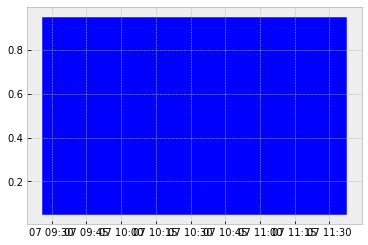

In [20]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['power', 'current', 'voltage', 'pf', 'frequency']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['power', 'current', 'voltage', 'pf', 'frequency']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['power', 'current', 'voltage', 'pf', 'frequency']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (microondas)


['power', 'current', 'voltage', 'pf', 'frequency']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['power', 'current', 'voltage', 'pf', 'frequency']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['power', 'current', 'voltage', 'pf', 'frequency']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['power', 'current', 'voltage', 'pf', 'frequency']

In [33]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa aceite)

['power', 'current', 'voltage', 'pf', 'frequency']

In [34]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['power', 'current', 'voltage', 'pf', 'frequency']

In [35]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['power', 'current', 'voltage', 'pf', 'frequency']

In [36]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['power', 'current', 'voltage', 'pf', 'frequency']

In [37]:
elec[11].available_physical_quantities() #medidas de ElecMeter 11 (congelador)

['power', 'current', 'voltage', 'pf', 'frequency']

## Medidas disponibles relativas a la potencia


In [38]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [39]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [40]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [41]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [42]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [43]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [44]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [45]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [46]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [47]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [48]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [49]:
freezer = elec['fan']
freezer.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [50]:
boiler = elec['kettle']
boiler.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [51]:
fan = elec['vacuum cleaner']
fan.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [52]:
television = elec['television']
television.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [53]:
microwave = elec['microwave']
microwave.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [54]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [55]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [56]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [57]:
fridge = elec[10]
fridge.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

In [58]:
freezer = elec[11]
freezer.available_columns()

[('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('voltage', None),
 ('current', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [59]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['power', 'current', 'voltage', 'pf', 'frequency']
Mediciones de Potencia disponibles - Dataset: ['apparent', 'active', 'reactive']

Medidas disponibles por cada medidor:
Main: ['power', 'current', 'voltage', 'pf', 'frequency']
Electric furnace: ['power', 'current', 'voltage', 'pf', 'frequency']
Microwave: ['power', 'current', 'voltage', 'pf', 'frequency']
Television: ['power', 'current', 'voltage', 'pf', 'frequency']
Kettle: ['power', 'current', 'voltage', 'pf', 'frequency']
Vacuum cleaner: ['power', 'current', 'voltage', 'pf', 'frequency']
Electric space heater: ['power', 'current', 'voltage', 'pf', 'frequency']
Electric shower heater: ['power', 'current', 'voltage', 'pf', 'frequency']
Fan: ['power', 'current', 'voltage', 'pf', 'frequency']
Fridge: ['power', 'current', 'voltage', 'pf', 'frequency']
Freezer: ['power', 'current', 'voltage', 'pf', 'frequency']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [60]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

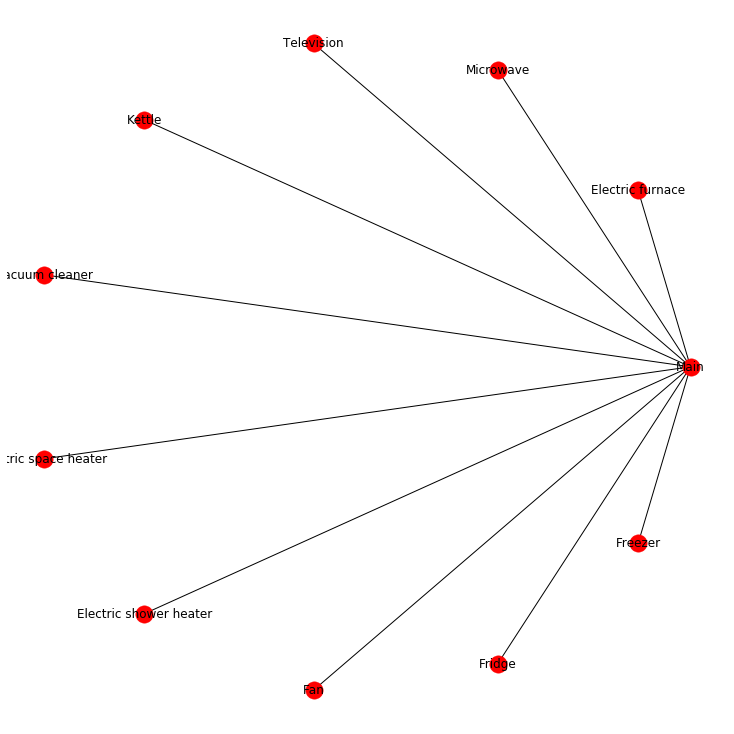

In [61]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)
#fig = elec.draw_wiring_graph(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [62]:
elec.get_timeframe()

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [63]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.184515,5.171018,0.0,7.395792,4.563028,7.188543,7.590068,6.575097,7.729356,11.271597
2022-11-07 10:26:00+01:00,1355.974976,792.033569,0.0,5.996029,503.989532,7.281439,7.400056,6.392639,75.555763,62.804089
2022-11-07 10:27:00+01:00,2051.272461,1246.502930,0.0,5.942144,750.579468,7.238587,7.372242,6.315014,78.540840,63.972080
2022-11-07 10:28:00+01:00,2038.523315,1232.078491,0.0,5.483394,752.530518,7.145421,7.334353,6.348352,76.926460,66.167839
2022-11-07 10:29:00+01:00,2030.187256,1217.698730,0.0,5.482594,735.651367,7.199955,7.358157,6.312464,74.184334,68.398697
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1957.348511,3.917081,NaN,6.269866,3.797471,NaN,1490.497192,38.241627,6.592444,9.848446
2022-11-07 12:34:00+01:00,1948.216064,3.904327,NaN,6.253445,3.780879,NaN,1490.507568,38.207169,6.568821,9.787971
2022-11-07 12:35:00+01:00,1941.883423,3.904507,NaN,6.221429,3.769219,NaN,1487.029785,38.138527,6.578386,9.754848
2022-11-07 12:36:00+01:00,1464.445435,4.173374,NaN,6.372907,3.956484,NaN,1119.891235,30.031176,6.751473,9.940753


Ahora veamos la potencia reactiva de los medidores del 2 al 11 (todos menos el principal).

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,-1.193840,-1.580966,-2.547700,-1.883101,-1.167255,-4.352417,-2.768792,-2.601079,-1.892248,-3.690412
2022-11-07 10:26:00+01:00,25.015287,248.020950,-2.329456,-2.203345,38.140797,-4.113100,-2.661955,-2.538689,12.040404,12.550424
2022-11-07 10:27:00+01:00,34.018738,332.252319,-2.260613,-1.903478,51.490265,-4.058380,-2.581341,-2.449036,8.232028,13.206454
2022-11-07 10:28:00+01:00,27.815872,297.751587,-2.280204,-1.736646,49.349163,-4.040287,-2.579894,-2.479195,8.089380,13.387150
2022-11-07 10:29:00+01:00,26.076275,274.528839,-2.274844,-1.742216,44.353176,-4.076494,-2.606638,-2.491886,7.369856,13.641544
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,55.892570,-1.283346,NaN,-1.448994,-0.965479,NaN,1.287535,-2.107105,-1.834528,-3.331299
2022-11-07 12:34:00+01:00,55.303967,-1.328281,NaN,-1.508471,-0.946202,NaN,1.265473,-2.206153,-1.814360,-3.315053
2022-11-07 12:35:00+01:00,54.699562,-1.300408,NaN,-1.470255,-0.960806,NaN,1.232611,-2.383463,-1.817909,-3.327555
2022-11-07 12:36:00+01:00,40.765350,-1.358818,NaN,-1.503585,-0.975578,NaN,0.355890,-2.428096,-1.833623,-3.355172


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.288854,5.415025,3.812110,7.636046,4.722235,8.411257,8.084754,7.077630,7.961765,11.863559
2022-11-07 10:26:00+01:00,1356.293701,842.189087,3.544653,6.806985,505.573120,8.404842,7.869067,6.886499,77.309875,64.733780
2022-11-07 10:27:00+01:00,2051.636230,1290.133667,3.325691,6.721591,752.348938,8.307381,7.815920,6.780525,78.972008,65.322235
2022-11-07 10:28:00+01:00,2038.789307,1267.615601,3.317054,5.796281,754.155090,8.223353,7.779383,6.820901,77.351517,67.509216
2022-11-07 10:29:00+01:00,2030.434448,1248.307739,3.377684,5.819084,736.998047,8.281644,7.811003,6.794641,74.603546,69.746689
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1958.146240,4.132893,NaN,6.441957,3.927973,NaN,1490.497803,38.300716,6.847435,10.400258
2022-11-07 12:34:00+01:00,1949.000977,4.137153,NaN,6.446645,3.910177,NaN,1490.508057,38.272083,6.819908,10.338138
2022-11-07 12:35:00+01:00,1942.653687,4.125131,NaN,6.400969,3.901440,NaN,1487.030396,38.214157,6.829993,10.310248
2022-11-07 12:36:00+01:00,1465.040405,4.444996,NaN,6.740518,4.100001,NaN,1119.995117,30.263321,7.001396,10.505280


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [66]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2022-11-07 10:25:00+01:00 to 2022-11-07 12:37:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          133 non-null float32
(Microwave,)                 133 non-null float32
(Television,)                98 non-null float32
(Kettle,)                    133 non-null float32
(Vacuum cleaner,)            133 non-null float32
(Electric space heater,)     110 non-null float32
(Electric shower heater,)    133 non-null float32
(Fan,)                       133 non-null float32
(Fridge,)                    133 non-null float32
(Freezer,)                   133 non-null float32
dtypes: float32(10)
memory usage: 6.2 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2(horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [67]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.828122  7.367841 -1.091630  7.286450  50.042301   
2022-11-07 10:25:51+01:00  0.836761  7.265294 -1.242939  7.154650  50.042919   
2022-11-07 10:25:52+01:00  0.839858  7.259385 -1.097424  7.166024  50.043678   
2022-11-07 10:25:53+01:00  0.842714  7.309815 -1.177494  7.206580  50.044479   
2022-11-07 10:25:54+01:00  0.829971  7.328613 -1.115254  7.236790  50.045483   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.761397  7.159179 -0.839475  7.107266  50.009800   
2022-11-07 12:37:12+01:00  0.785285  6.822647 -0.845717  6.767492  50.010201   
2022-11-07 12:37:13+01:00  0.768542  6.938344 -0.967546  6.868936  50.010361   
2022-11-07 12:37:14+01:00  0.812656  6.927406 -1.123573  6.830468  50.010159   
2022-11-07 12:37:15+01:00  0.800034  6.911345 -0.772360  6.865227  50.009800   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.036127  
2022-11-07 10:25:51+01:00  244.134003  0.035020  
2022-11-07 10:25:52+01:00  244.102997  0.034939  
2022-11-07 10:25:53+01:00  244.044998  0.035053  
2022-11-07 10:25:54+01:00  244.003006  0.035735  
...                               ...       ...  
2022-11-07 12:37:11+01:00  246.337402  0.038134  
2022-11-07 12:37:12+01:00  246.260193  0.035152  
2022-11-07 12:37:13+01:00  246.205795  0.036365  
2022-11-07 12:37:14+01:00  246.287598  0.034120  
2022-11-07 12:37:15+01:00  246.317001  0.034854  

[7886 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [68]:
df_ef.head()

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.828122  7.367841 -1.091630  7.286450  50.042301   
2022-11-07 10:25:51+01:00  0.836761  7.265294 -1.242939  7.154650  50.042919   
2022-11-07 10:25:52+01:00  0.839858  7.259385 -1.097424  7.166024  50.043678   
2022-11-07 10:25:53+01:00  0.842714  7.309815 -1.177494  7.206580  50.044479   
2022-11-07 10:25:54+01:00  0.829971  7.328613 -1.115254  7.236790  50.045483   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.036127  
2022-11-07 10:25:51+01:00  244.134003  0.035020  
2022-11-07 10:25:52+01:00  244.102997  0.034939  
2022-11-07 10:25:53+01:00  244.044998  0.035053  
2022-11-07 10:25:54+01:00  244.003006  0.035735

Vemos para el meter nº 3( microondas) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [69]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_m = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_m

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.660888  5.422386 -1.549855  5.191770  50.042301   
2022-11-07 10:25:51+01:00  0.735550  5.397243 -1.536246  5.169464  50.042919   
2022-11-07 10:25:52+01:00  0.724111  5.489447 -1.703968  5.212958  50.043678   
2022-11-07 10:25:53+01:00  0.737398  5.529471 -1.580822  5.289062  50.044479   
2022-11-07 10:25:54+01:00  0.730685  5.421606 -1.608058  5.173304  50.045483   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.345314  5.289296 -1.596692  4.954476  50.009800   
2022-11-07 12:37:12+01:00  0.414973  4.744870 -1.376008  4.444440  50.010201   
2022-11-07 12:37:13+01:00  0.447762  4.923931 -1.382694  4.723348  50.010361   
2022-11-07 12:37:14+01:00  0.634163  4.932479 -1.207352  4.770012  50.010159   
2022-11-07 12:37:15+01:00  0.716807  5.079450 -0.956232  4.972217  50.009800   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.032564  
2022-11-07 10:25:51+01:00  244.134003  0.028788  
2022-11-07 10:25:52+01:00  244.102997  0.029544  
2022-11-07 10:25:53+01:00  244.044998  0.029421  
2022-11-07 10:25:54+01:00  244.003006  0.029065  
...                               ...       ...  
2022-11-07 12:37:11+01:00  246.337402  0.063494  
2022-11-07 12:37:12+01:00  246.260193  0.047452  
2022-11-07 12:37:13+01:00  246.205795  0.046331  
2022-11-07 12:37:14+01:00  246.287598  0.031173  
2022-11-07 12:37:15+01:00  246.317001  0.028122  

[7886 rows x 7 columns]

Vemos para el meter nº 4(television) con datos capturados de  09:40 a 11:44  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [70]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_ef = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_ef

physical_quantity                pf     power                   frequency  \
type                                 apparent  reactive active              
2022-11-07 10:25:50+01:00  0.364979  3.882956 -2.630270    0.0  50.006302   
2022-11-07 10:25:51+01:00  0.340646  3.881022 -2.550750    0.0  50.006020   
2022-11-07 10:25:52+01:00  0.348819  3.938619 -2.606114    0.0  50.006359   
2022-11-07 10:25:53+01:00  0.372800  3.881651 -2.660002    0.0  50.006538   
2022-11-07 10:25:54+01:00  0.363501  3.732122 -2.405044    0.0  50.006981   
...                             ...       ...       ...    ...        ...   
2022-11-07 12:02:15+01:00  0.345720  3.827610 -2.391830    0.0  49.959919   
2022-11-07 12:02:16+01:00  0.326801  3.519192 -2.311950    0.0  49.959202   
2022-11-07 12:02:17+01:00  0.387936  3.840053 -2.603060    0.0  49.958679   
2022-11-07 12:02:18+01:00  0.323253  3.667107 -2.446744    0.0  49.958839   
2022-11-07 12:02:19+01:00  0.297384  3.989035 -3.041760    0.0  49.958801   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  243.005997  0.032171  
2022-11-07 10:25:51+01:00  242.981003  0.035361  
2022-11-07 10:25:52+01:00  242.968994  0.034611  
2022-11-07 10:25:53+01:00  242.892792  0.031223  
2022-11-07 10:25:54+01:00  242.863998  0.032249  
...                               ...       ...  
2022-11-07 12:02:15+01:00  237.959198  0.036165  
2022-11-07 12:02:16+01:00  238.052399  0.033905  
2022-11-07 12:02:17+01:00  238.089005  0.030913  
2022-11-07 12:02:18+01:00  237.991196  0.035862  
2022-11-07 12:02:19+01:00  237.845001  0.036486  

[5790 rows x 7 columns]

Veamos para el meter nº 5(tetera)  con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [71]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sh = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_sh

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.762694  7.506434 -1.831445  7.279035  50.042301   
2022-11-07 10:25:51+01:00  0.827272  7.492664 -1.830168  7.258340  50.042919   
2022-11-07 10:25:52+01:00  0.820641  7.684723 -1.891464  7.442066  50.043678   
2022-11-07 10:25:53+01:00  0.837154  7.517369 -1.760202  7.306136  50.044479   
2022-11-07 10:25:54+01:00  0.817511  7.753886 -1.771844  7.546744  50.045483   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.306492  7.590178 -1.924437  7.089506  50.009800   
2022-11-07 12:37:12+01:00  0.433685  8.590604 -2.378801  8.080216  50.010201   
2022-11-07 12:37:13+01:00  0.451383  7.483288 -1.628524  7.301056  50.010361   
2022-11-07 12:37:14+01:00  0.758374  7.164178 -1.662612  6.959200  50.010159   
2022-11-07 12:37:15+01:00  0.790607  7.299072 -1.615877  7.116386  50.009800   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.039312  
2022-11-07 10:25:51+01:00  244.134003  0.035958  
2022-11-07 10:25:52+01:00  244.102997  0.037174  
2022-11-07 10:25:53+01:00  244.044998  0.035769  
2022-11-07 10:25:54+01:00  244.003006  0.038006  
...                               ...       ...  
2022-11-07 12:37:11+01:00  246.337402  0.118301  
2022-11-07 12:37:12+01:00  246.260193  0.090345  
2022-11-07 12:37:13+01:00  246.205795  0.081578  
2022-11-07 12:37:14+01:00  246.287598  0.037297  
2022-11-07 12:37:15+01:00  246.317001  0.036609  

[7886 rows x 7 columns]

Veamos para el meter nº 6(Aspiradora) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final




df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.703081  4.917452 -1.234681  4.734455  50.042301   
2022-11-07 10:25:51+01:00  0.709884  4.743901 -1.057337  4.620018  50.042919   
2022-11-07 10:25:52+01:00  0.660335  4.421978 -1.262764  4.234598  50.043678   
2022-11-07 10:25:53+01:00  0.705113  4.708701 -0.922875  4.610588  50.044479   
2022-11-07 10:25:54+01:00  0.696188  4.846502 -1.178867  4.680916  50.045483   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.555465  4.732275 -1.147764  4.562704  50.009800   
2022-11-07 12:37:12+01:00  0.623917  4.816113 -0.964895  4.712454  50.010201   
2022-11-07 12:37:13+01:00  0.629683  4.802683 -1.130571  4.655100  50.010361   
2022-11-07 12:37:14+01:00  0.702934  4.475716 -0.928334  4.366306  50.010159   
2022-11-07 12:37:15+01:00  0.701367  4.433688 -1.051838  4.291437  50.009800   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  244.151001  0.027578  
2022-11-07 10:25:51+01:00  244.134003  0.026667  
2022-11-07 10:25:52+01:00  244.102997  0.026346  
2022-11-07 10:25:53+01:00  244.044998  0.026801  
2022-11-07 10:25:54+01:00  244.003006  0.027617  
...                               ...       ...  
2022-11-07 12:37:11+01:00  246.337402  0.034439  
2022-11-07 12:37:12+01:00  246.260193  0.031208  
2022-11-07 12:37:13+01:00  246.205795  0.030784  
2022-11-07 12:37:14+01:00  246.287598  0.025236  
2022-11-07 12:37:15+01:00  246.317001  0.024904  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 7(estufa de aceite) con datos capturados  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_sph = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_sph

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.621248  8.665943 -4.691375  7.283970  50.006302   
2022-11-07 10:25:51+01:00  0.592685  8.394989 -4.393990  7.152572  50.006020   
2022-11-07 10:25:52+01:00  0.586413  8.231041 -4.323384  7.004076  50.006359   
2022-11-07 10:25:53+01:00  0.610394  8.361275 -4.221234  7.207452  50.006538   
2022-11-07 10:25:54+01:00  0.646840  8.568418 -4.274990  7.419224  50.006981   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:14:03+01:00  0.656564  7.843154 -4.049258  6.707062  49.996658   
2022-11-07 12:14:04+01:00  0.640675  7.963431 -4.054210  6.844404  49.996700   
2022-11-07 12:14:05+01:00  0.605106  7.793215 -3.903912  6.743764  49.997421   
2022-11-07 12:14:06+01:00  0.632713  7.850462 -4.269862  6.578520  49.998180   
2022-11-07 12:14:07+01:00  0.696010  8.410793 -4.680525  6.967410  49.998398   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  243.005997  0.048395  
2022-11-07 10:25:51+01:00  242.981003  0.050268  
2022-11-07 10:25:52+01:00  242.968994  0.049416  
2022-11-07 10:25:53+01:00  242.892792  0.048886  
2022-11-07 10:25:54+01:00  242.863998  0.047301  
...                               ...       ...  
2022-11-07 12:14:03+01:00  242.038406  0.042231  
2022-11-07 12:14:04+01:00  242.117599  0.044278  
2022-11-07 12:14:05+01:00  242.083405  0.046126  
2022-11-07 12:14:06+01:00  242.188599  0.042928  
2022-11-07 12:14:07+01:00  242.141998  0.041345  

[6498 rows x 7 columns]

Veamos para el ultimo meter nº 8(calentador de agua) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_shh = next(elec[8].load())[t0:t1] #DataFrame medidor boiler
df_shh

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.806154  8.154102 -2.768837  7.669127  50.051102   
2022-11-07 10:25:51+01:00  0.793264  8.205682 -2.792642  7.708908  50.050499   
2022-11-07 10:25:52+01:00  0.796357  8.057948 -2.734266  7.571050  50.049080   
2022-11-07 10:25:53+01:00  0.802765  8.221642 -2.867826  7.699924  50.048119   
2022-11-07 10:25:54+01:00  0.808463  7.952118 -2.934056  7.382578  50.047100   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.773159  7.384576 -2.617760  6.902234  50.011940   
2022-11-07 12:37:12+01:00  0.763338  7.040678 -2.264654  6.659976  50.013580   
2022-11-07 12:37:13+01:00  0.782651  7.099157 -2.332690  6.693332  50.012341   
2022-11-07 12:37:14+01:00  0.808520  7.366346 -2.162874  7.029644  50.010719   
2022-11-07 12:37:15+01:00  0.788097  7.233079 -2.230363  6.878923  50.009102   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  242.783005  0.039209  
2022-11-07 10:25:51+01:00  242.578796  0.040066  
2022-11-07 10:25:52+01:00  242.521805  0.039221  
2022-11-07 10:25:53+01:00  242.408005  0.039548  
2022-11-07 10:25:54+01:00  242.339203  0.037679  
...                               ...       ...  
2022-11-07 12:37:11+01:00  244.639404  0.036516  
2022-11-07 12:37:12+01:00  244.576202  0.035686  
2022-11-07 12:37:13+01:00  244.551407  0.034967  
2022-11-07 12:37:14+01:00  244.671005  0.035492  
2022-11-07 12:37:15+01:00  244.658661  0.035679  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 9(ventilador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.750092  7.201509 -2.737563  6.655686  50.051102   
2022-11-07 10:25:51+01:00  0.787391  7.209461 -2.667628  6.694276  50.050499   
2022-11-07 10:25:52+01:00  0.779148  7.028145 -2.621056  6.517590  50.049080   
2022-11-07 10:25:53+01:00  0.778846  7.295950 -2.888478  6.697558  50.048119   
2022-11-07 10:25:54+01:00  0.780393  7.020620 -2.472922  6.558612  50.047100   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.478559  6.289281 -2.203204  5.841860  50.011940   
2022-11-07 12:37:12+01:00  0.488581  6.437218 -2.349889  5.926882  50.013580   
2022-11-07 12:37:13+01:00  0.543570  6.585692 -2.746586  5.977440  50.012341   
2022-11-07 12:37:14+01:00  0.746045  6.630899 -2.686830  6.055034  50.010719   
2022-11-07 12:37:15+01:00  0.661770  6.650600 -2.413017  6.178010  50.009102   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  242.783005  0.036592  
2022-11-07 10:25:51+01:00  242.578796  0.035046  
2022-11-07 10:25:52+01:00  242.521805  0.034446  
2022-11-07 10:25:53+01:00  242.408005  0.035486  
2022-11-07 10:25:54+01:00  242.339203  0.034609  
...                               ...       ...  
2022-11-07 12:37:11+01:00  244.639404  0.049941  
2022-11-07 12:37:12+01:00  244.576202  0.052025  
2022-11-07 12:37:13+01:00  244.551407  0.046254  
2022-11-07 12:37:14+01:00  244.671005  0.033189  
2022-11-07 12:37:15+01:00  244.658661  0.041126  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 10(nevera) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [76]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_fridge = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity                pf     power                      frequency  \
type                                 apparent  reactive    active              
2022-11-07 10:25:50+01:00  0.816552  7.847692 -1.627757  7.674577  50.051102   
2022-11-07 10:25:51+01:00  0.839192  8.080462 -1.909736  7.845194  50.050499   
2022-11-07 10:25:52+01:00  0.850934  7.984697 -1.945134  7.742482  50.049080   
2022-11-07 10:25:53+01:00  0.821660  7.860661 -1.924998  7.619180  50.048119   
2022-11-07 10:25:54+01:00  0.829956  7.992158 -2.027012  7.725106  50.047100   
...                             ...       ...       ...       ...        ...   
2022-11-07 12:37:11+01:00  0.832780  7.609888 -1.910124  7.363848  50.011940   
2022-11-07 12:37:12+01:00  0.829596  7.728779 -2.071056  7.442794  50.013580   
2022-11-07 12:37:13+01:00  0.842764  7.564477 -1.700674  7.363652  50.012341   
2022-11-07 12:37:14+01:00  0.847864  7.832551 -2.079102  7.548486  50.010719   
2022-11-07 12:37:15+01:00  0.815290  7.594199 -1.966933  7.332500  50.009102   

physical_quantity             voltage   current  
type                                             
2022-11-07 10:25:50+01:00  242.783005  0.038966  
2022-11-07 10:25:51+01:00  242.578796  0.038541  
2022-11-07 10:25:52+01:00  242.521805  0.037541  
2022-11-07 10:25:53+01:00  242.408005  0.038268  
2022-11-07 10:25:54+01:00  242.339203  0.038400  
...                               ...       ...  
2022-11-07 12:37:11+01:00  244.639404  0.036144  
2022-11-07 12:37:12+01:00  244.576202  0.036680  
2022-11-07 12:37:13+01:00  244.551407  0.035724  
2022-11-07 12:37:14+01:00  244.671005  0.036377  
2022-11-07 12:37:15+01:00  244.658661  0.036761  

[7886 rows x 7 columns]

Veamos para el ultimo meter nº 11(congelador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [77]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_freezer = next(elec[11].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity                pf      power                       \
type                                  apparent  reactive     active   
2022-11-07 10:25:50+01:00  0.892254  11.974049 -3.633443  11.406834   
2022-11-07 10:25:51+01:00  0.876774  11.833040 -3.805466  11.202740   
2022-11-07 10:25:52+01:00  0.885041  11.696890 -3.492754  11.161759   
2022-11-07 10:25:53+01:00  0.885393  11.876330 -3.670778  11.291420   
2022-11-07 10:25:54+01:00  0.883754  12.006897 -3.761450  11.398240   
...                             ...        ...       ...        ...   
2022-11-07 12:37:11+01:00  0.755344  11.692302 -3.943192  10.980342   
2022-11-07 12:37:12+01:00  0.755744  11.317475 -3.761746  10.654132   
2022-11-07 12:37:13+01:00  0.779233  11.397908 -3.760156  10.756992   
2022-11-07 12:37:14+01:00  0.865596  11.475832 -3.906650  10.785680   
2022-11-07 12:37:15+01:00  0.820773  10.974250 -3.578030  10.374233   

physical_quantity          frequency     voltage   current  
type                                                        
2022-11-07 10:25:50+01:00  50.051102  242.783005  0.052662  
2022-11-07 10:25:51+01:00  50.050499  242.578796  0.052682  
2022-11-07 10:25:52+01:00  50.049080  242.521805  0.052005  
2022-11-07 10:25:53+01:00  50.048119  242.408005  0.052625  
2022-11-07 10:25:54+01:00  50.047100  242.339203  0.053218  
...                              ...         ...       ...  
2022-11-07 12:37:11+01:00  50.011940  244.639404  0.059358  
2022-11-07 12:37:12+01:00  50.013580  244.576202  0.057974  
2022-11-07 12:37:13+01:00  50.012341  244.551407  0.056719  
2022-11-07 12:37:14+01:00  50.010719  244.671005  0.050939  
2022-11-07 12:37:15+01:00  50.009102  244.658661  0.052186  

[7886 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [78]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0442654905851696

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [79]:
series = next(fan.power_series())
series.head()

2022-11-07 10:25:50+01:00    4.734455
2022-11-07 10:25:51+01:00    4.620018
2022-11-07 10:25:52+01:00    4.234598
2022-11-07 10:25:53+01:00    4.610588
2022-11-07 10:25:54+01:00    4.680916
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [80]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-11-07 10:25:50+01:00   -1.234681
2022-11-07 10:25:51+01:00   -1.057337
2022-11-07 10:25:52+01:00   -1.262764
2022-11-07 10:25:53+01:00   -0.922875
2022-11-07 10:25:54+01:00   -1.178867
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [81]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-11-07 10:25:50+01:00,-1.234681
2022-11-07 10:25:51+01:00,-1.057337
2022-11-07 10:25:52+01:00,-1.262764
2022-11-07 10:25:53+01:00,-0.922875
2022-11-07 10:25:54+01:00,-1.178867


Para cargar datos de voltaje:

In [82]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-11-07 10:25:50+01:00,244.151001
2022-11-07 10:25:51+01:00,244.134003
2022-11-07 10:25:52+01:00,244.102997
2022-11-07 10:25:53+01:00,244.044998
2022-11-07 10:25:54+01:00,244.003006


In [83]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                    
type                       apparent  reactive    active
2022-11-07 10:25:50+01:00  4.917452 -1.234681  4.734455
2022-11-07 10:25:51+01:00  4.743901 -1.057337  4.620018
2022-11-07 10:25:52+01:00  4.421978 -1.262764  4.234598
2022-11-07 10:25:53+01:00  4.708701 -0.922875  4.610588
2022-11-07 10:25:54+01:00  4.846502 -1.178867  4.680916

### Cargando especificando el tipo de CA

In [84]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:50+01:00,4.734455
2022-11-07 10:25:51+01:00,4.620018
2022-11-07 10:25:52+01:00,4.234598
2022-11-07 10:25:53+01:00,4.610588
2022-11-07 10:25:54+01:00,4.680916


### Cargando por remuestreo a un período específico

In [85]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:00+01:00,4.563028
2022-11-07 10:26:00+01:00,503.989532
2022-11-07 10:27:00+01:00,750.579468
2022-11-07 10:28:00+01:00,752.530518
2022-11-07 10:29:00+01:00,735.651367


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [86]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0442654905851696

## Potencia activa, aparente y reactiva

In [87]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity                power voltage       power               \
type                          apparent     NaN    reactive       active   
2022-11-07 10:25:00+01:00    90.058754     NaN  -29.812645    81.356606   
2022-11-07 10:26:00+01:00  5559.408691     NaN  657.781555  5473.208496   
2022-11-07 10:27:00+01:00  8311.277344     NaN  876.899841  8232.378906   
2022-11-07 10:28:00+01:00  8238.339844     NaN  799.731812  8171.767090   
2022-11-07 10:29:00+01:00  8156.560059     NaN  741.164978  8097.776367   
...                                ...     ...         ...          ...   
2022-11-07 12:33:00+01:00  3518.695312     NaN   46.209354  3516.512695   
2022-11-07 12:34:00+01:00  3509.432861     NaN   45.450916  3507.226318   
2022-11-07 12:35:00+01:00  3499.466309     NaN   44.671780  3497.280029   
2022-11-07 12:36:00+01:00  2648.091064     NaN   29.666367  2645.562744   
2022-11-07 12:37:00+01:00    57.634880     NaN  -15.885850    54.420643   

physical_quantity         frequency  pf current  
type                            NaN NaN     NaN  
2022-11-07 10:25:00+01:00       NaN NaN     NaN  
2022-11-07 10:26:00+01:00       NaN NaN     NaN  
2022-11-07 10:27:00+01:00       NaN NaN     NaN  
2022-11-07 10:28:00+01:00       NaN NaN     NaN  
2022-11-07 10:29:00+01:00       NaN NaN     NaN  
...                             ...  ..     ...  
2022-11-07 12:33:00+01:00       NaN NaN     NaN  
2022-11-07 12:34:00+01:00       NaN NaN     NaN  
2022-11-07 12:35:00+01:00       NaN NaN     NaN  
2022-11-07 12:36:00+01:00       NaN NaN     NaN  
2022-11-07 12:37:00+01:00       NaN NaN     NaN  

[133 rows x 7 columns]

### Energia Total

In [88]:
elec.mains().total_energy() # returns kWh

apparent    3.854267
reactive    0.151746
active      3.845632
dtype: float64

In [89]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,56.72,397.04,1758.30
Electric furnace,9.42,65.97,292.17
Microwave,5.49,38.46,170.33
Television,0.28,1.98,8.76
Kettle,6.95,48.66,215.49
Vacuum cleaner,4.17,29.16,129.13
Electric space heater,8.63,60.39,267.43
Electric shower heater,20.44,143.06,633.53
Fan,0.45,3.12,13.80
Fridge,1.24,8.65,38.29


### Energia por submedidor

Veamos la energia  para el submedidor

In [90]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.860129,0.501428,0.018931,0.634384,0.380147,0.648716,1.865061,0.040625,0.112711,0.083375
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [91]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [92]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [93]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

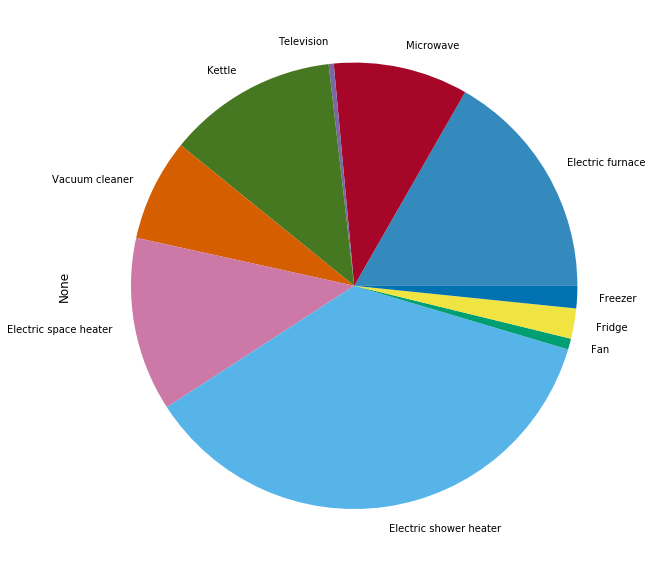

In [94]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

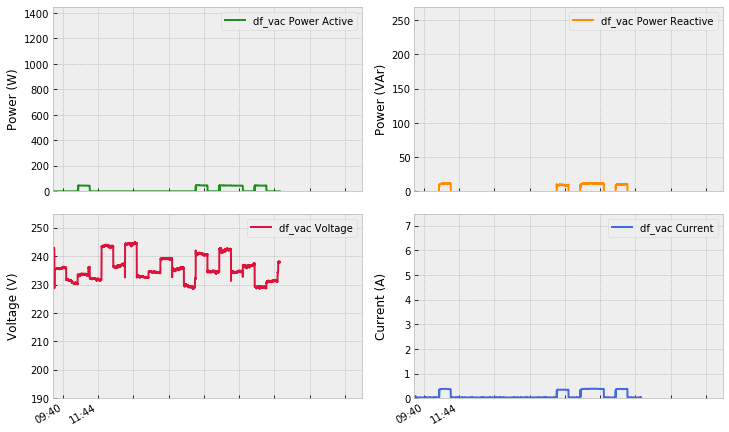

In [95]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_vac = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ef.svg', bbox_inches='tight', transparent=True)
pass

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (microondas)

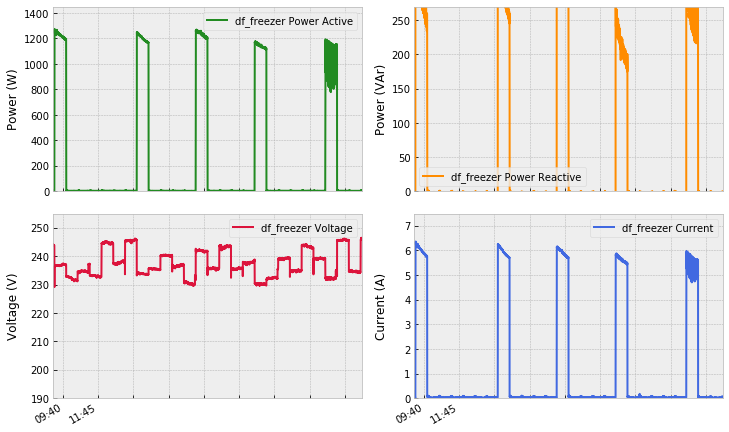

In [96]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

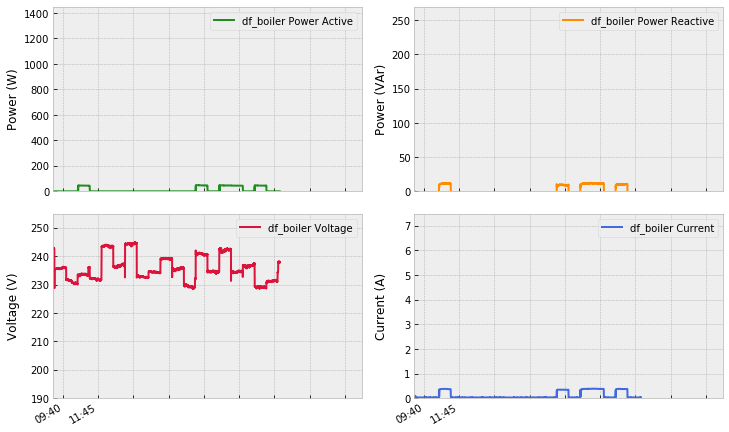

In [97]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

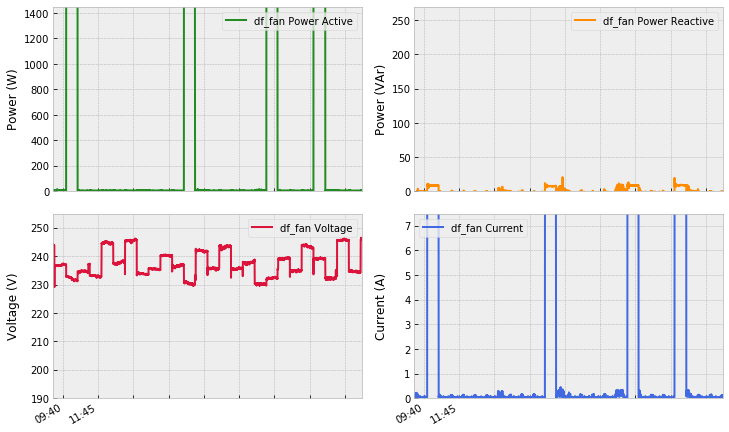

In [98]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

###  Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

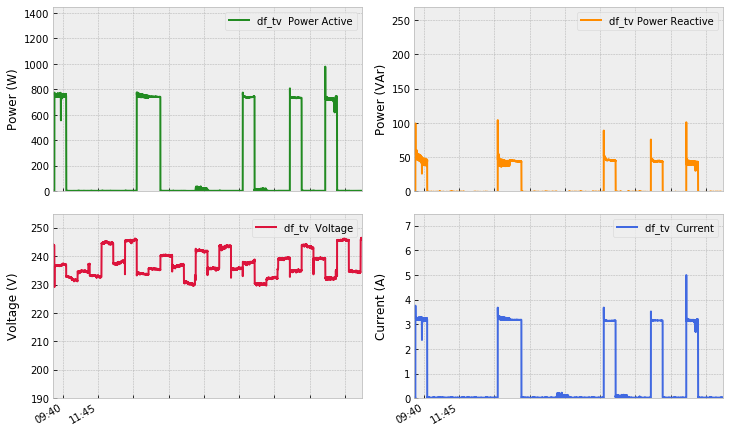

In [99]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Estufa de aceite

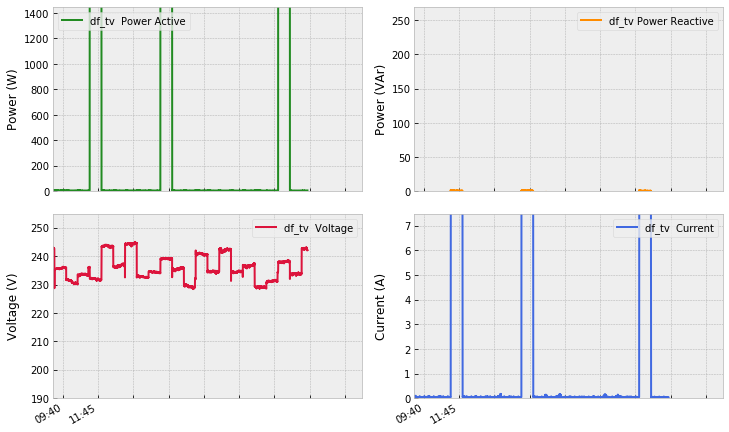

In [100]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

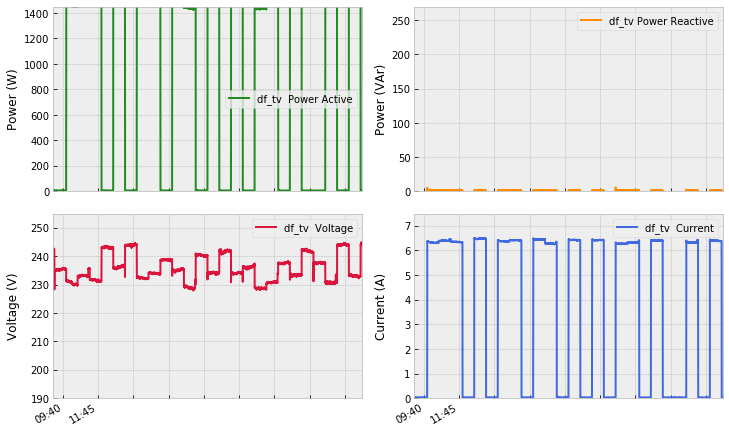

In [101]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

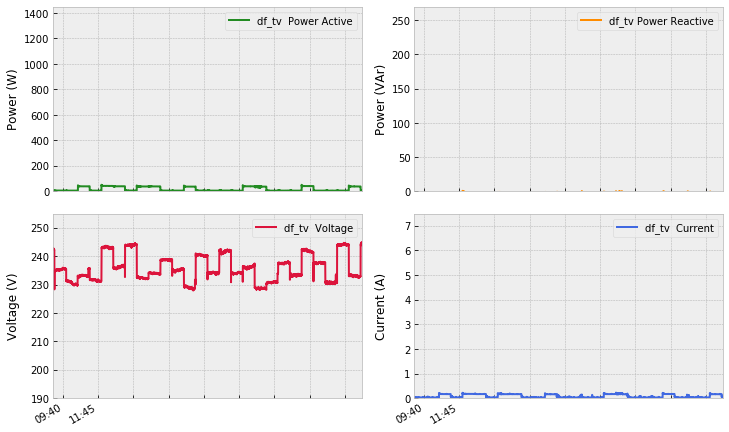

In [102]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

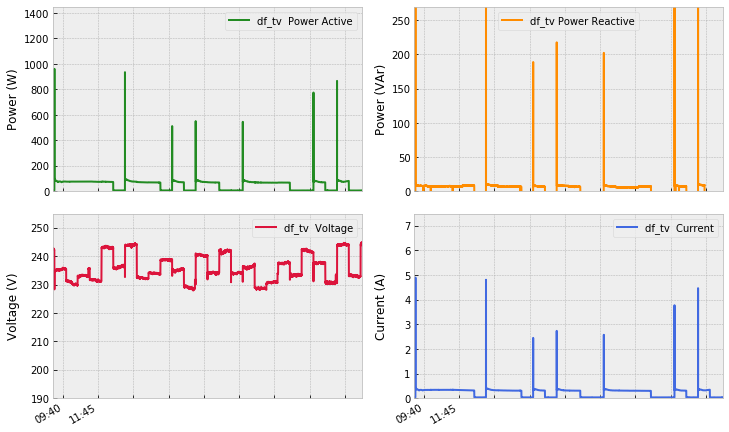

In [103]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

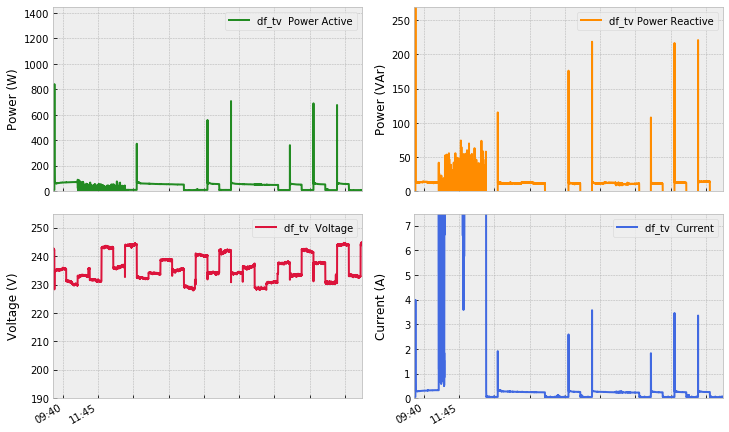

In [104]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

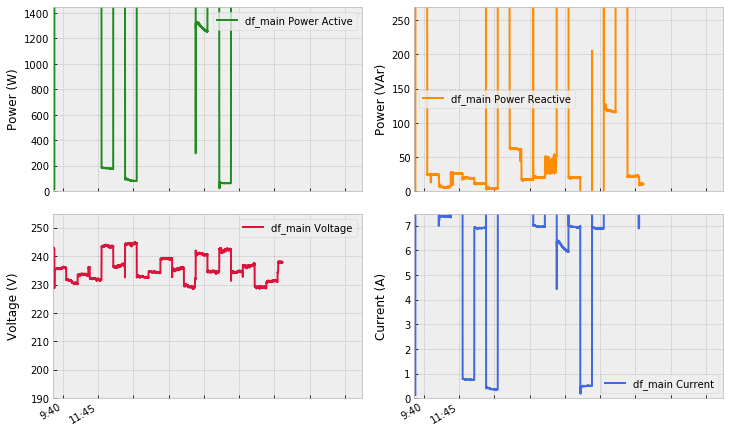

In [105]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

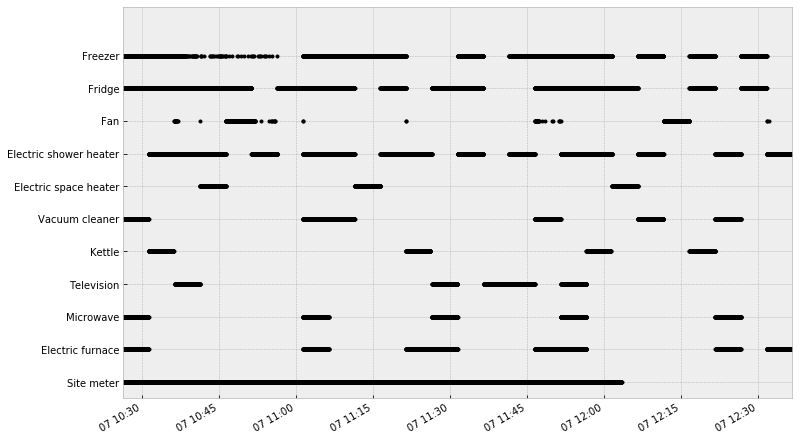

In [106]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

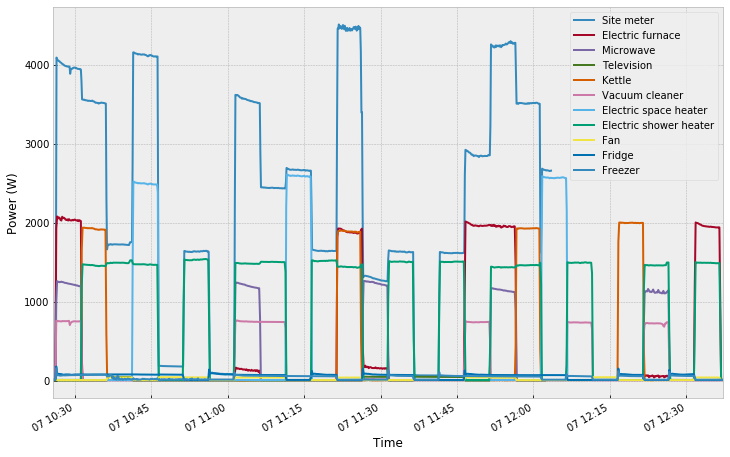

In [107]:
dsualm.set_window(start='2022-11', end='2022-12')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [108]:
from pandas.plotting import autocorrelation_plot

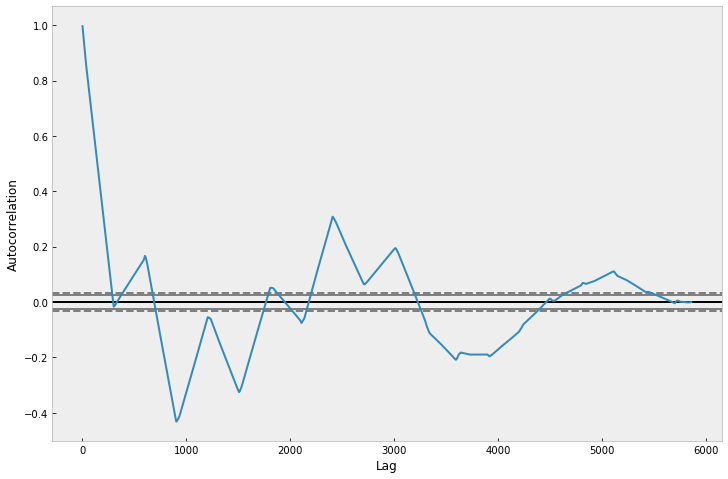

In [109]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [110]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

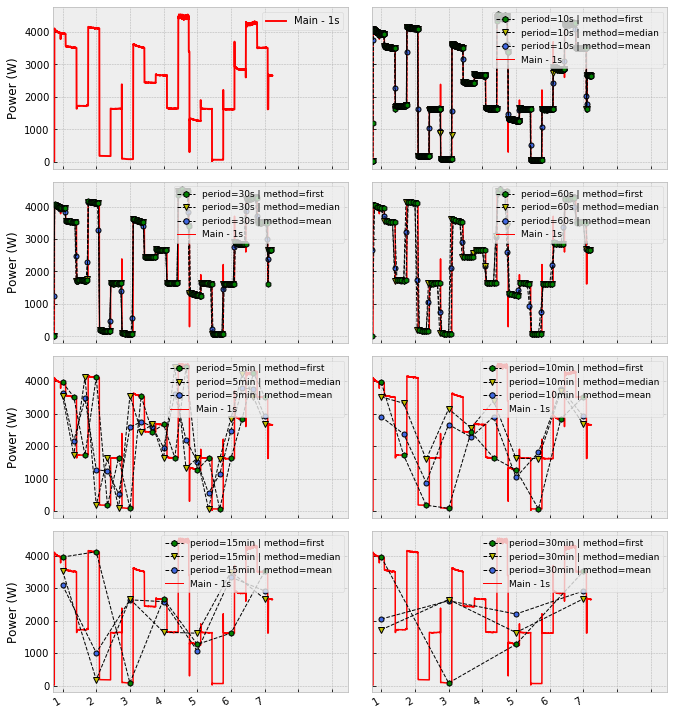

In [111]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [112]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

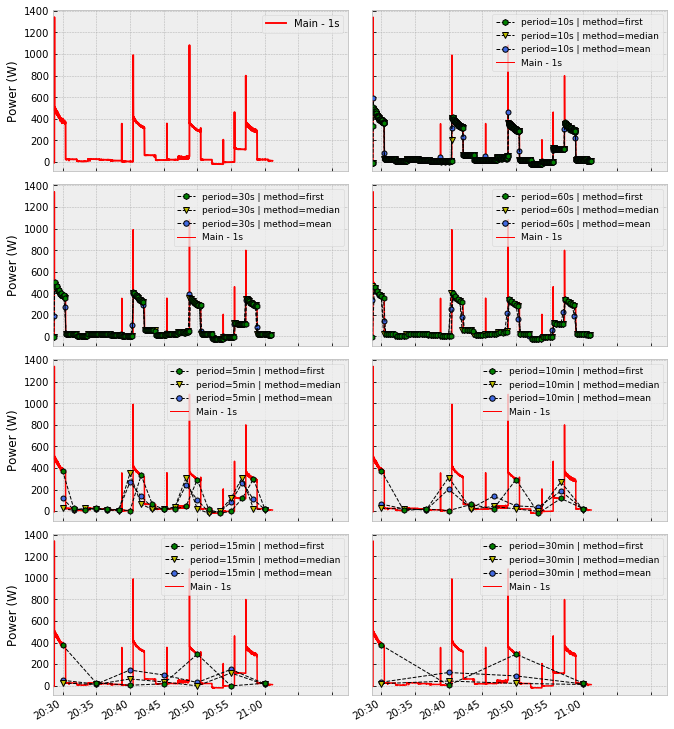

In [113]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass